In [37]:
#파일의 경로 확인 os 연결
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

os.walk('/kaggle/input')

/kaggle/input/sizefit/modcloth_final_data.json
/kaggle/input/sizefit/renttherunway_final_data.json


<generator object walk at 0x7f86e6e74650>

*****본 코딩은 고객의 온라인 쇼핑 편의성과 효율성을 극대화 하고자, 소비자에게 맞는 사이즈를 추천/ 또는 적합한 옷을 추천 해주는 데에 있다. 이는 환불률을 극소화 하고자 하는 목표도 있는 바이다. *****

데이터 사용:

1. ratings reviews
2. fit feetback(small/fit/large)
3. customer/ product measurements
4. category information

*input data:
df_mod (82790,18)
df_run (192544,15)*

In [38]:
import json
modcl = []
rentrun = []

for line in open('../input/sizefit/modcloth_final_data.json', 'r'):
    modcl.append(json.loads(line))
    
for line in open('../input/sizefit/renttherunway_final_data.json', 'r'):
    rentrun.append(json.loads(line))
    
df_mod = pd.json_normalize(modcl)
df_run = pd.json_normalize(rentrun)

In [39]:
df_mod.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [40]:
df_mod.info() # 82790를 포함하는 상세내용; item_id, user_id, user_name, size, category, fit
# dtype 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  object 
 1   waist           2882 non-null   object 
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  object 
 6   bra size        76772 non-null  object 
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  object 
 14  shoe size       27915 non-null  object 
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [41]:
df_mod.head(5)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29,7,5.0,d,38,34,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31,13,3.0,b,30,36,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30,7,2.0,b,NaN,32,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [42]:
missing_mod = pd.DataFrame({'total_missing': df_mod.isnull().sum(), 'percentage': (df_mod.isnull().sum()/82790)*100})
missing_mod # waist, quality, cup size, hips, bra size, bust, height, length, shoe size, shoe width, review_summary, review_text 빈 값이 많음

,total_missing,percentage
item_id,0,0.000000
waist,79908,96.518903
size,0,0.000000
quality,68,0.082136
cup size,6255,7.555260
hips,26726,32.281677
bra size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


In [43]:
df_run.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

In [44]:
df_run.info() # 192544를 포함하는 상세내용; item_id, user_id, size, category, fit, review_text, review_summary, review_date
# dtype 확인 - object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fit             192544 non-null  object
 1   user_id         192544 non-null  object
 2   bust size       174133 non-null  object
 3   item_id         192544 non-null  object
 4   weight          162562 non-null  object
 5   rating          192462 non-null  object
 6   rented for      192534 non-null  object
 7   review_text     192544 non-null  object
 8   body type       177907 non-null  object
 9   review_summary  192544 non-null  object
 10  category        192544 non-null  object
 11  height          191867 non-null  object
 12  size            192544 non-null  int64 
 13  age             191584 non-null  object
 14  review_date     192544 non-null  object
dtypes: int64(1), object(14)
memory usage: 22.0+ MB


In [45]:
missing_run = pd.DataFrame({'total_missing': df_run.isnull().sum(), 'percentage': (df_run.isnull().sum()/192544)*100})
missing_run #bust size, weight, body type, height, age 가 빈 값이 많음

,total_missing,percentage
fit,0,0.000000
user_id,0,0.000000
bust size,18411,9.561970
item_id,0,0.000000
weight,29982,15.571506
rating,82,0.042588
rented for,10,0.005194
review_text,0,0.000000
body type,14637,7.601899
review_summary,0,0.000000


In [46]:
#df_mod['cup size'].unique()
df_run['weight'].unique()  
# df_mod < df_run  (category unique values)

array(['137lbs', '132lbs', nan, '135lbs', '145lbs', '138lbs', '112lbs',
       '118lbs', '114lbs', '120lbs', '142lbs', '140lbs', '170lbs',
       '143lbs', '115lbs', '123lbs', '122lbs', '165lbs', '130lbs',
       '155lbs', '105lbs', '190lbs', '150lbs', '136lbs', '128lbs',
       '174lbs', '125lbs', '110lbs', '160lbs', '180lbs', '175lbs',
       '134lbs', '109lbs', '124lbs', '250lbs', '195lbs', '231lbs',
       '161lbs', '126lbs', '210lbs', '215lbs', '220lbs', '163lbs',
       '106lbs', '178lbs', '157lbs', '185lbs', '108lbs', '200lbs',
       '92lbs', '117lbs', '146lbs', '116lbs', '141lbs', '103lbs',
       '121lbs', '127lbs', '111lbs', '152lbs', '172lbs', '107lbs',
       '133lbs', '248lbs', '154lbs', '153lbs', '131lbs', '156lbs',
       '129lbs', '186lbs', '100lbs', '113lbs', '148lbs', '119lbs',
       '166lbs', '144lbs', '158lbs', '95lbs', '234lbs', '139lbs',
       '230lbs', '184lbs', '102lbs', '205lbs', '168lbs', '162lbs',
       '147lbs', '98lbs', '225lbs', '204lbs', '89lbs', '159

**Data Preprocessing (데이터 전처리 과정)**

1) NaN 처리
2) int type 이 아닌 object type의 데이터 처리 
3) 관계 추측 --> 시각화

In [47]:
#1) NaN 처리
# (1) KNN 알고리즘   (o)
# (2) mean/median
# (3) most frequent or zero/constant
# (4) MICE
# (5) Datawig (딥러닝 사용)

In [48]:
#2) Dtype 에서의 변환
# height -> (cm)변환 
def get_cms_mod(x):
    if type(x) == type(1.0):
        return
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)

def get_cms_run(x):
    if type(x) == type(1.0):
        return
    try: 
        return (int(x[0])*30.48) + (int(x[3])*2.54)
    except:
        return (int(x[0])*30.48)
    
df_mod['height'] = df_mod['height'].apply(lambda x: get_cms_mod(x))

df_run['height'] = df_run['height'].apply(lambda x: get_cms_run(x))

In [49]:
# cup size -> (cm) 변환 
def conv_cup_size(cup_size_code):
    if cup_size_code == 'aa':
        return 10
    if cup_size_code == 'a':
        return 12
    if cup_size_code == 'b':
        return 14
    if cup_size_code == 'c':
        return 16
    if cup_size_code == 'd':
        return 18
    if cup_size_code == 'dd/e':
        return 20
    if cup_size_code == 'ddd/f':
        return 22
    if cup_size_code == 'dddd/g':
        return 24
    if cup_size_code == 'h':
        return 26
    if cup_size_code == 'i':
        return 28
    if cup_size_code == 'j':
        return 30
    if cup_size_code == 'k':
        return 32 
    else:
        return 
    
def conv_bust_size(x):
    return str(x)[0:2]
    
df_mod['cup size'] = df_mod['cup size'].apply(lambda x: conv_cup_size(x))

#df_run['bust size'].fillna(value = str('unknown')) 일정한 문자배열로 지정할 경우
df_run['bust size'] = df_run['bust size'].apply(lambda x: conv_bust_size(x))


# weight -> pounds 없애기

def conv_weight(x):
    x = str(x).replace('lbs','')
    return x

#df_run['weight'].fillna(value = str('unknown')) 일정한 문자배열로 지정할 경우
df_run['weight'] = df_run['weight'].apply(lambda x: conv_weight(x))

In [59]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  object 
 1   waist           2882 non-null   object 
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  float64
 5   hips            56064 non-null  object 
 6   bra size        76772 non-null  object 
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  float64
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  object 
 14  shoe size       27915 non-null  object 
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [60]:
#예외의 경우 존재 37-39 -> 한 숫자 38로 변환
df_mod.at[df_mod[df_mod.bust == '37-39'].index[0],'bust'] = '38'


In [67]:
#예외의 경우 존재  na -> nan으로 변환
df_run['bust size'] = df_run['bust size'].apply(lambda x: np.nan if x == 'na' else x)
df_run['bust size'].values

array(['34', '34', nan, ..., '36', '36', '36'], dtype=object)

In [69]:
df_run['weight'].values

array(['137', '132', 'nan', ..., '135', '165', '155'], dtype=object)

In [70]:
# KNN 알고리즘  - 실제 주어진 데이터가 빈 값으로 존재할 경우 사용하면 높은 정확도를 산출해낼 수 있음. test data 존재할 경우 accuracy 확인
# np.nan을 constant/0/평균값/중간값으로 채우는 것보다 정확도가 높음

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10) #n_neighbors 변환 가능 7,8,9

mod_knn_ind_features = df_mod[['waist', 'hips', 'cup size', 'bra size', 'bust', 'height', 'shoe size']]
run_knn_ind_features = df_run[['weight', 'bust size', 'height', 'age']]

df_filled_mod = imputer.fit_transform(mod_knn_ind_features)
df_filled_run = imputer.fit_transform(run_knn_ind_features)


knn_mod = pd.DataFrame(data=df_filled_mod, columns=['waist', 'hips', 'cup size', 'bra size', 'bust', 'height', 'shoe size'])
knn_run = pd.DataFrame(data=df_filled_run, columns=['weight', 'bust size', 'height', 'age'])


In [71]:
df_mod_new = df_mod.drop(['waist', 'hips', 'cup size', 'bra size', 'bust', 'height', 'shoe size'], axis=1)
# 새로 채워진 값들을 함유한 데이터프레임 concatenation
df_mod_imputed = pd.concat([df_mod_new, knn_mod], axis=1)
df_mod_imputed.isnull().sum()

item_id               0
size                  0
quality              68
category              0
user_name             0
length               35
fit                   0
user_id               0
shoe width        64183
review_summary     6725
review_text        6725
waist                 0
hips                  0
cup size              0
bra size              0
bust                  0
height                0
shoe size             0
dtype: int64

In [72]:
df_run_new = df_run.drop(['weight', 'bust size', 'height'], axis=1)

df_run_imputed = pd.concat([df_run_new, knn_run], axis=1)
df_run_imputed.isnull().sum()

fit                   0
user_id               0
item_id               0
rating               82
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
size                  0
age                 960
review_date           0
weight                0
bust size             0
height                0
age                   0
dtype: int64

**Visualizations (데이터의 시각화. 데이터간 상관관계 파악)**

In [77]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [87]:
import seaborn as sns

def plot_dist(df, indipendent_features):
    plt.figure(figsize=(25, 25))
    for loc, feature in enumerate(indipendent_features):
        ax = plt.subplot(3, 3, loc+1)
        sns.distplot(df[feature]) #히스토그램과 커널 밀도 그래프를 모두 표시하는 function (distplot)
    return None


In [74]:
#상관관계확인 - .corr() 피어슨 상관계수 이용
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # NaN 가진 칼람 drop
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

In [75]:
# Scatter and Density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # numerical columns만 보유
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values #상관계수 이용
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

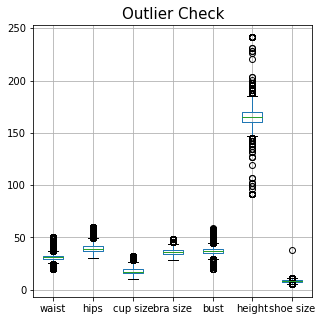

In [107]:
columns_for_outlier = ['waist', 'hips', 'cup size', 'bra size', 'bust', 'height', 'shoe size']
plt.figure(figsize= (5,5)) #실제 확인시  (9,9) 로 확인
df_mod_imputed[columns_for_outlier].boxplot()
plt.title("Outlier Check", fontsize = 15) #shoe size (38)
plt.show()

In [83]:
knn_mod.to_csv('./knnmod', header=False, index=False)
knn_run.to_csv('./knnrun', header=False, index=False)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

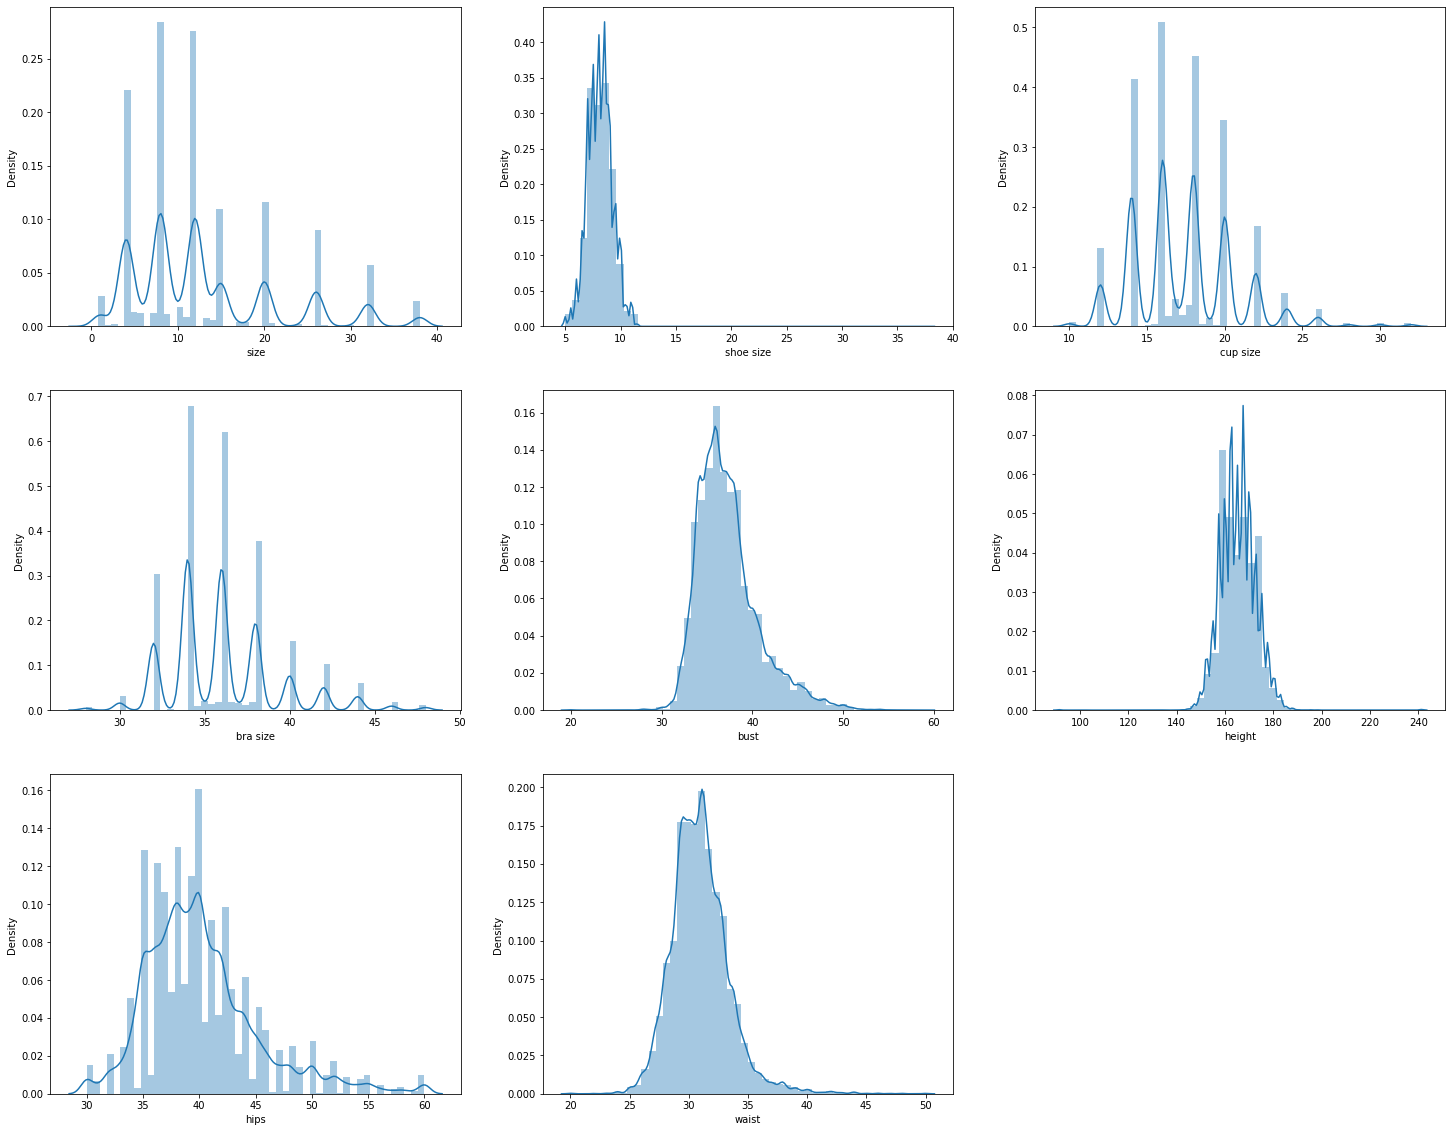

In [92]:
plot_dist(df_mod_imputed, ['size', 'shoe size', 'cup size', 'bra size', 'bust', 'height', 'hips', 'waist'])

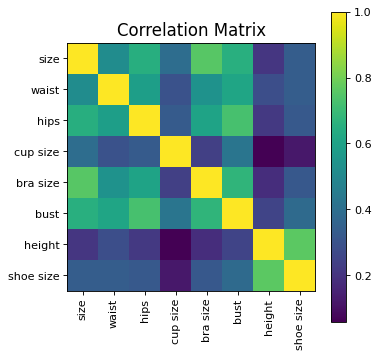

In [94]:
plotCorrelationMatrix(df_mod_imputed,5)

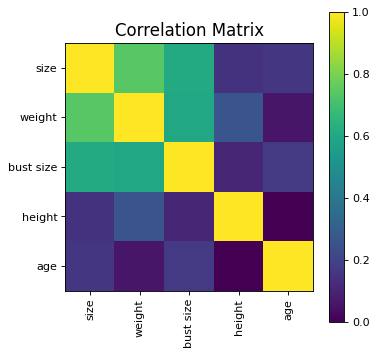

In [96]:
plotCorrelationMatrix(df_run_imputed,5)

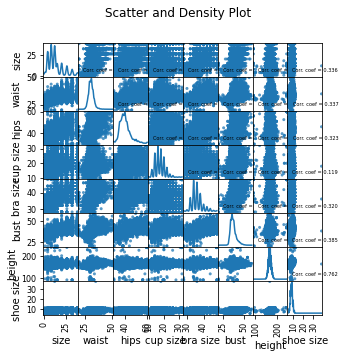

In [106]:
plotScatterMatrix(df_mod_imputed,5,5)

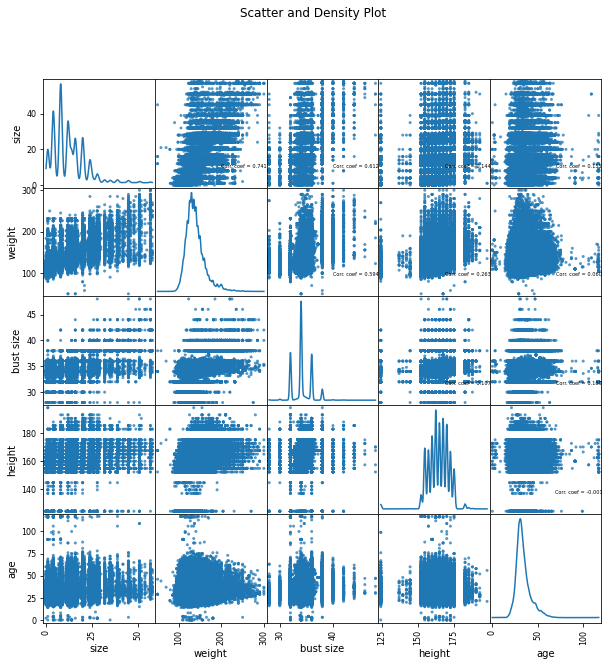

In [100]:
plotScatterMatrix(df_run_imputed,10,5)